In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('../dataset/실습데이터.csv')
df.head(5)

,Timestamp,OUTPUT_COUNT_DAY_1.xlsx,KO6_MOTOR_SET_FREQ.xlsx,CUTTING_SET_FREQ.xlsx,STATUS.xlsx,KO5_MOTOR_SET_FREQ.xlsx,METAL_OIL_SUPPLY_PRESS_CONTR.xlsx,KO4_MOTOR_SET_FREQ.xlsx,KO2_MOTOR_SET_FREQ.xlsx,MAIN_MOTOR_CURR.xlsx,...,CUTTING_CURR.xlsx,KO5_MOTOR_CURR.xlsx,KO2_MOTOR_CURR.xlsx,KO1_MOTOR_INVERTER_ALM.xlsx,TRANS_POS_DOWN_SET_H.xlsx,OUTPUT_COUNT_DAY_2.xlsx,OUTPUT_COUNT_SUM.xlsx,TRANS_POS_DOWN.xlsx,TRANS_POS_RIGHT.xlsx,MAIN_MOTOR_ALM.xlsx
0,2022-05-02 06:32:33,25878.0,3000.0,3000.0,0.0,3000.0,661.166,3000.0,3000.0,2192.5,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,1741.75,0.0
1,2022-05-02 06:32:34,25878.0,3000.0,3000.0,0.0,3000.0,798.000,3000.0,3000.0,4108.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
2,2022-05-02 06:32:35,25878.0,3000.0,3000.0,0.0,3000.0,794.000,3000.0,3000.0,4158.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.42,0.0
3,2022-05-02 06:32:36,25878.0,3000.0,3000.0,0.0,3000.0,788.600,3000.0,3000.0,4118.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.50,0.0
4,2022-05-02 06:32:37,25878.0,3000.0,3000.0,0.0,3000.0,804.200,3000.0,3000.0,4063.0,...,0.0,0.0,0.0,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0


In [7]:
temp_df = pd.read_csv('../dataset/TempHumidLog.csv', encoding='cp949')
temp_df.head(5)

,지점,지점명,일시,기온(°C),기온 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C)
0,105,강릉,2022-05-02 00:00,10.4,NaN,71,NaN,8.9,5.3
1,105,강릉,2022-05-02 01:00,9.4,NaN,74,NaN,8.7,4.9
2,105,강릉,2022-05-02 02:00,9.0,NaN,74,NaN,8.5,4.6
3,105,강릉,2022-05-02 03:00,9.1,NaN,68,NaN,7.8,3.4
4,105,강릉,2022-05-02 04:00,9.0,NaN,66,NaN,7.5,2.9


In [8]:
print("df의 컬럼: ", df.columns)
print("temp_df: ", temp_df.columns)

df의 컬럼:  Index(['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'KO6_MOTOR_SET_FREQ.xlsx',
       'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx',
       'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx',
       'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx',
       'KO3_MOTOR_SET_FREQ.xlsx', 'TRANS_POS_UP_SET_H.xlsx',
       'TRANS_POS_RIGHT_SET_L.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx',
       'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx',
       'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx',
       'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx',
       'TRANS_POS_LEFT_SET_H.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx',
       'TRANS_POS_DOWN_SET_L.xlsx', 'KO6_MOTOR_CURR.xlsx',
       'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx',
       'KO3_MOTOR_CURR.xlsx', 'TRANS_POS_UP.xlsx', 'TONGS_POS.xlsx',
       'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx',
       'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_E

In [9]:
 temp_df.info()
 ## 기온 QC플래그 열에서 NaN이 아닌 값을 출력하고 싶어
 temp_df[temp_df['기온 QC플래그'].notnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         2808 non-null   int64  
 1   지점명        2808 non-null   object 
 2   일시         2808 non-null   object 
 3   기온(°C)     2808 non-null   float64
 4   기온 QC플래그   0 non-null      float64
 5   습도(%)      2808 non-null   int64  
 6   습도 QC플래그   0 non-null      float64
 7   증기압(hPa)   2808 non-null   float64
 8   이슬점온도(°C)  2808 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 197.6+ KB


,지점,지점명,일시,기온(°C),기온 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C)


In [10]:
temp_df.columns

Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '습도(%)', '습도 QC플래그',
       '증기압(hPa)', '이슬점온도(°C)'],
      dtype='object')

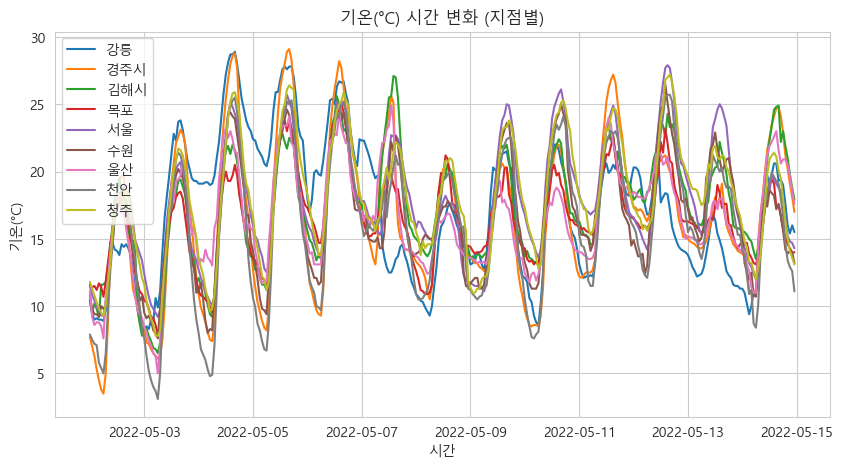

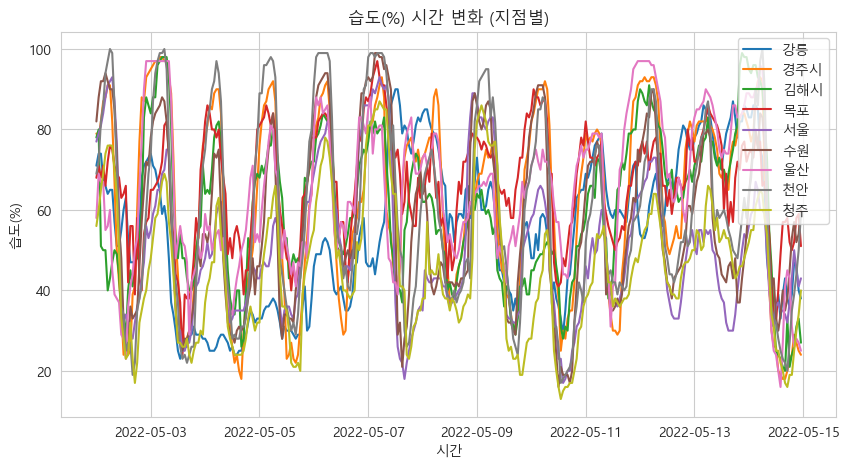

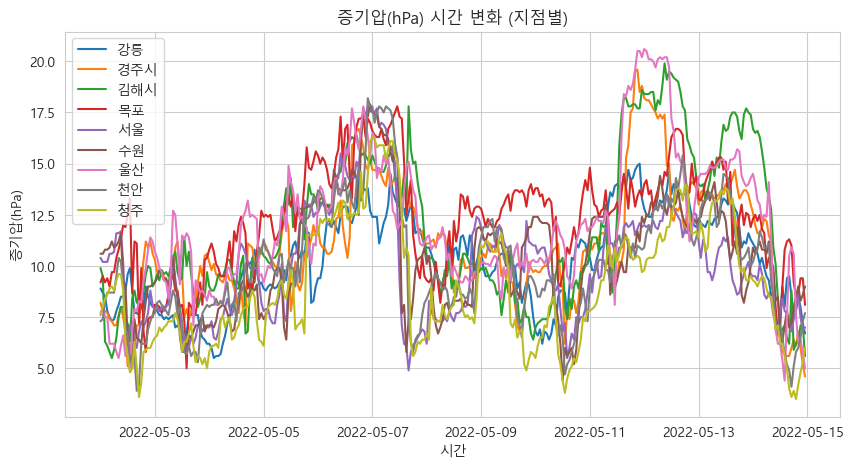

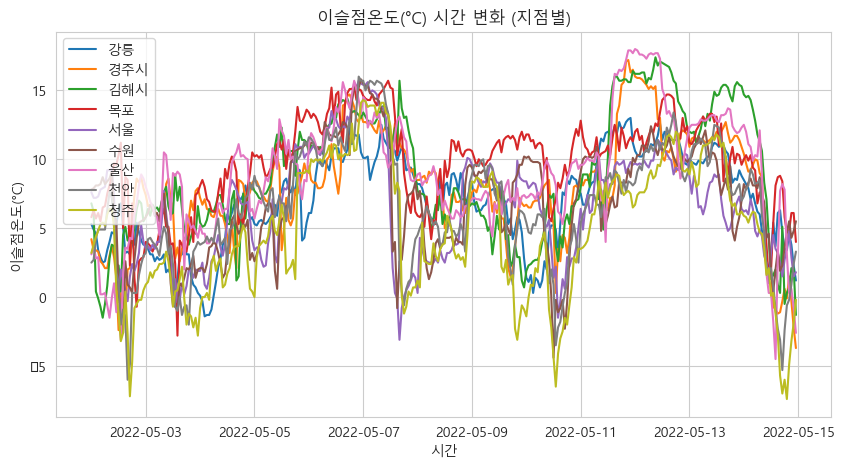

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 시간 컬럼 datetime 변환
temp_df['일시'] = pd.to_datetime(temp_df['일시'])

# QC 플래그는 무시, 필요 없는 컬럼 제거
temp_df = temp_df[['지점명', '일시', '기온(°C)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)']]

# 그래프 그릴 변수 목록
variables = ["기온(°C)", "습도(%)", "증기압(hPa)", "이슬점온도(°C)"]

# 지점별 선그래프
for var in variables:
    plt.figure(figsize=(10, 5))
    for site, group in temp_df.groupby('지점명'):
        plt.plot(group["일시"], group[var], label=site)
    plt.title(f"{var} 시간 변화 (지점별)")
    plt.xlabel("시간")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.show()


## 공정 데이터와 지역별 온습도와의 상관관계 분석
- 분석결과 공장은 수도권에 있는 것으로 판별.
- 지역은 수원으로 확정 예정
- 공정 데이터에 수원시 온습도 데이터를 병합 예정

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# 1. df를 1시간 단위로 집계
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_hourly = df.set_index('Timestamp').resample('1H').agg({
    'MAIN_MOTOR_CURR.xlsx': 'mean',
    'OIL_SUPPLY_PRESS.xlsx': 'mean',
    'MAIN_AIR_PRESS.xlsx': 'mean',
    'METAL_TEMP_CONTROL.xlsx': 'mean',
    'OUTPUT_COUNT_SUM.xlsx': 'max'  # 누적값은 최대값
})

# 2. temp_df 준비
temp_df['일시'] = pd.to_datetime(temp_df['일시'])

# 3. 각 지점별로 상관관계 분석
results = []

for location in temp_df['지점명'].unique():
    location_weather = temp_df[temp_df['지점명'] == location].copy()
    location_weather = location_weather.set_index('일시')

    # 시간대 매칭
    merged = df_hourly.join(location_weather[['기온(°C)', '습도(%)', '증기압(hPa)']],
                            how='inner')

    if len(merged) < 24:  # 최소 24시간 이상 데이터 필요
        continue

    # 여러 변수와 기온/습도의 상관관계 계산
    corr_temp_list = []
    corr_humid_list = []

    for col in ['MAIN_MOTOR_CURR.xlsx', 'OIL_SUPPLY_PRESS.xlsx',
                'MAIN_AIR_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx']:
        if col in merged.columns and merged[col].notna().sum() > 0:
            # 기온과의 상관관계
            corr_temp, _ = spearmanr(merged[col].dropna(),
                                     merged.loc[merged[col].notna(), '기온(°C)'])
            corr_temp_list.append(abs(corr_temp))

            # 습도와의 상관관계
            corr_humid, _ = spearmanr(merged[col].dropna(),
                                      merged.loc[merged[col].notna(), '습도(%)'])
            corr_humid_list.append(abs(corr_humid))

    # 평균 상관계수 계산
    avg_corr_temp = np.mean(corr_temp_list) if corr_temp_list else 0
    avg_corr_humid = np.mean(corr_humid_list) if corr_humid_list else 0
    avg_corr_overall = np.mean(corr_temp_list + corr_humid_list) if (corr_temp_list + corr_humid_list) else 0

    results.append({
        '지점명': location,
        '데이터 포인트': len(merged),
        '평균_상관계수_기온': avg_corr_temp,
        '평균_상관계수_습도': avg_corr_humid,
        '평균_상관계수_전체': avg_corr_overall
    })

# 결과 정리
results_df = pd.DataFrame(results).sort_values('평균_상관계수_전체', ascending=False)
print(results_df)

   지점명  데이터 포인트  평균_상관계수_기온  평균_상관계수_습도  평균_상관계수_전체
2   수원      287    0.234488    0.262657    0.248572
1   서울      287    0.241990    0.237060    0.239525
6   천안      287    0.213618    0.258039    0.235829
7  김해시      287    0.221632    0.233853    0.227742
4   울산      287    0.150778    0.232026    0.191402
3   청주      287    0.198494    0.183981    0.191237
5   목포      287    0.147945    0.215266    0.181605
8  경주시      287    0.150534    0.210968    0.180751
0   강릉      287    0.130230    0.122614    0.126422


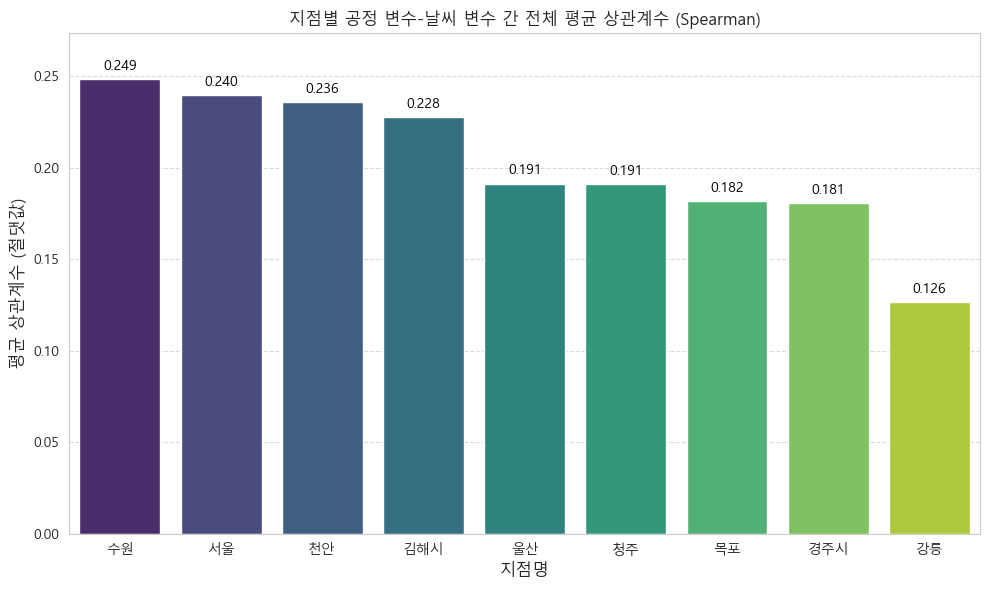

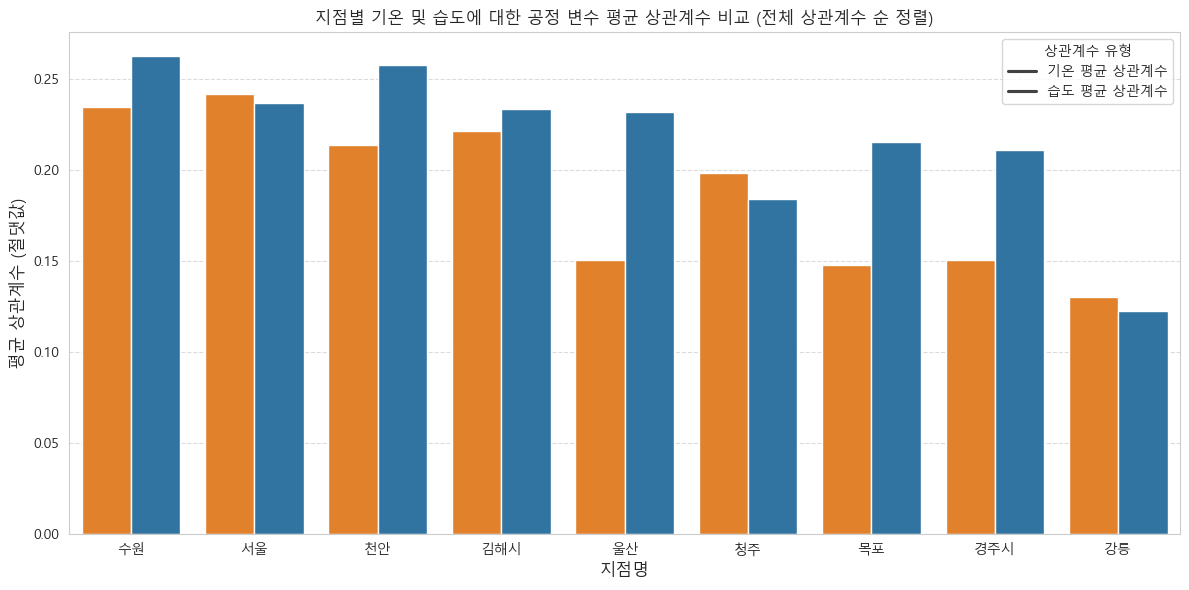

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'results_df' 데이터프레임이 준비되었다고 가정

# ----------------------------------------------------------------------------------
# 1. 지점별 공정 변수-날씨 변수 간 전체 평균 상관계수 시각화
# ----------------------------------------------------------------------------------
def plot_overall_correlation(df):
    """지점별 전체 평균 상관계수를 막대 그래프로 시각화"""
    # 평균 상관계수 전체를 기준으로 내림차순 정렬
    plot_df = df.sort_values('평균_상관계수_전체', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='지점명',
        y='평균_상관계수_전체',
        data=plot_df,
        palette='viridis'
    )
    plt.title('지점별 공정 변수-날씨 변수 간 전체 평균 상관계수 (Spearman)')
    plt.xlabel('지점명', fontsize=12)
    plt.ylabel('평균 상관계수 (절댓값)', fontsize=12)
    plt.ylim(0, plot_df['평균_상관계수_전체'].max() * 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 막대 위에 값 표시
    for index, row in plot_df.reset_index(drop=True).iterrows():
        plt.text(index, row['평균_상관계수_전체'] + 0.005,
                 f'{row["평균_상관계수_전체"]:.3f}', color='black', ha='center')

    plt.tight_layout()
    plt.show() # Jupyter/IDE 환경에서 결과를 바로 보려면 show() 사용
    # plt.savefig('overall_avg_correlation.png')

# ----------------------------------------------------------------------------------
# 2. 지점별 기온 vs 습도 평균 상관계수 비교 시각화
# ----------------------------------------------------------------------------------
def plot_temp_vs_humid_correlation(df):
    """기온과 습도에 대한 평균 상관계수를 지점별로 비교하는 막대 그래프 시각화"""
    # 1. 데이터 재구성: 기온 및 습도 상관계수를 하나의 '상관계수_유형' 열로 녹이기 (melt)
    melted_df = df.melt(
        id_vars=['지점명'],
        value_vars=['평균_상관계수_기온', '평균_상관계수_습도'],
        var_name='상관계수_유형',
        value_name='평균_상관계수'
    )

    # 2. 전체 평균 상관계수 순서대로 지점명 정렬 순서 정의
    order = df.sort_values('평균_상관계수_전체', ascending=False)['지점명'].tolist()

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='지점명',
        y='평균_상관계수',
        hue='상관계수_유형',
        data=melted_df,
        order=order, # 전체 상관계수 순으로 지점명 순서 적용
        palette={'평균_상관계수_기온': 'tab:orange', '평균_상관계수_습도': 'tab:blue'}
    )
    plt.title('지점별 기온 및 습도에 대한 공정 변수 평균 상관계수 비교 (전체 상관계수 순 정렬)')
    plt.xlabel('지점명', fontsize=12)
    plt.ylabel('평균 상관계수 (절댓값)', fontsize=12)
    plt.legend(title='상관계수 유형', labels=['기온 평균 상관계수', '습도 평균 상관계수'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show() # Jupyter/IDE 환경에서 결과를 바로 보려면 show() 사용
    # plt.savefig('temp_vs_humid_correlation.png')

# # 실제 데이터프레임 'results_df'가 준비된 후 아래 함수를 호출하여 시각화를 수행합니다.
plot_overall_correlation(results_df)
plot_temp_vs_humid_correlation(results_df)

## 추가) 데이터 파악을 위한 기본 통계

In [14]:
# 방법 2-B: 단순 통계 비교
print("=== 각 지점별 기온 통계 ===")
weather_stats = temp_df.groupby('지점명').agg({
    '기온(°C)': ['mean', 'std', 'min', 'max'],
    '습도(%)': ['mean', 'std']
}).round(2)

print(weather_stats)

# METAL_TEMP_CONTROL 값이 있다면 간접 비교
if 'METAL_TEMP_CONTROL.xlsx' in df_hourly.columns:
    print("\n=== 설비 온도 제어 통계 ===")
    print(df_hourly['METAL_TEMP_CONTROL.xlsx'].describe())

    # 각 지점과 설비 데이터 기간 비교
    print("\n=== 시간대 매칭 확인 ===")
    for location in temp_df['지점명'].unique():
        location_weather = temp_df[temp_df['지점명'] == location].copy()
        location_weather = location_weather.set_index('일시')

        merged = df_hourly.join(location_weather[['기온(°C)']], how='inner')
        print(f"{location}: {len(merged)}개 시간대 매칭")

=== 각 지점별 기온 통계 ===
    기온(°C)                   습도(%)       
      mean   std  min   max   mean    std
지점명                                      
강릉   17.24  5.08  8.3  28.9  54.95  18.59
경주시  16.54  5.61  3.5  29.1  62.54  23.01
김해시  17.29  4.16  6.5  27.1  60.56  18.47
목포   16.37  3.35  7.9  25.1  66.43  13.68
서울   17.88  4.33  9.2  27.9  50.73  18.10
수원   16.68  4.30  7.6  26.5  57.34  21.28
울산   16.45  3.88  5.0  24.9  64.77  18.66
천안   15.86  5.35  3.1  25.7  59.47  23.68
청주   18.04  4.39  7.8  27.2  45.25  17.38

=== 설비 온도 제어 통계 ===
count    178.000000
mean      37.552651
std        5.784740
min       17.397444
25%       34.304868
50%       38.877260
75%       42.000000
max       45.000000
Name: METAL_TEMP_CONTROL.xlsx, dtype: float64

=== 시간대 매칭 확인 ===
강릉: 287개 시간대 매칭
서울: 287개 시간대 매칭
수원: 287개 시간대 매칭
청주: 287개 시간대 매칭
울산: 287개 시간대 매칭
목포: 287개 시간대 매칭
천안: 287개 시간대 매칭
김해시: 287개 시간대 매칭
경주시: 287개 시간대 매칭
